# **Auto-Insurance Risk Analysis** 

## Description and Analysis of Business problem and data

[20-50 million](https://www.iii.org/fact-statistic/facts-statistics-auto-insurance) people are injured in auto accidents globally with an accrued cost of [$518 billion](https://www.asirt.org/safe-travel/road-safety-facts/). Since the first insurance claim in 1897, car insurance companies have worked to cover the expenses incurred from these incidents -  from property damage, medical expenses, lost wages, to legal fees.
With these enormous expenses insurance companies are obligated to take any opportunity to optimize their solvency and minimize losses. A large part of this is appropriately pricing policies and coverage, meaning, to not undercharge for drivers that cause catastrophic, costly incidents and not overcharge for safe customers that might never make a claim and could easily switch providers.

The previous underwriting and risk evaluation process for insurance companies could take a month with all the manual steps involved with generating a car insurance claim. But with so many incidents and claims, insurance companies are already applying technologies such as machine learning to improve their processes. Today you can receive car insurance in an hour and the company has already assessed your risk while considering things like driving history, credit history, and prevalence of fraud or inclement weather in your location. Part of that automated risk assessment includes the consideration of the driver's car model and attributes.

The focus of this project will be to develop a binary classification model to better predict whether risk is associated with a car based on its attributes. This will aid in the risk assessment process to offer more individualized rates car insurance rates, promoting customer retention and company solvency.



**Automobile Data Set ([UCI source](https://archive.ics.uci.edu/ml/datasets/Automobile)):**
This data from the UCI Machine Learning Repository was donated from Carnegie Mellon University and consists of 3 sources (1985 Ward's Automotive Yearbook, Insurance Services Personal Auto Manuals, and IIHS Insurance Collision Report). A paper was written in 1988 by UCI ([Source](https://escholarship.org/content/qt68f860zb/qt68f860zb.pdf?t=q67ipi)) which used this data in their development of 'instance-based prediction' but did not reference the context of car insurance whatsoever. Similarly a Kaggle competition was held in 2020 with this data where users experimented with a range of predictive models but with a sole focus on model performance rather than deployment. 

This establishes a need for our model, as the data has been used to train models but the results from the Kaggle competition are kept private along with the training test split to compare performances. 
The data has 205 records and 26 features (15 continuous, 1 integer, and 10 nominal), including the integer outcome ranging from -3 to +3. 

7 columns have missing values present (normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price). 'normalize-losses' has 44 missing values and the remaining columns each have 2 missing values. 44 records represents more than 1/5 of our data so these records will be replaced with the median rather than omitted from analysis. 

In [393]:
# Import packages

# Data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network  import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Results interpretation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from pandas_profiling import ProfileReport
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

## Data Preprocessing

### Import data

In [202]:
# Import just the data without column headers
insure = pd.read_csv("imports-85.data",header=None)
# Add names of column headers 
insure.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
insure.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [203]:
#insure.to_csv(r'C:\Users\joear\ISM6136\insurance.csv', index=False)

### Feature Engineering

In [204]:
# In dataset, missing values are denoted by '?', replace them with NaNs.
insure = insure.replace('?',np.nan)

In [205]:
# Examine datatypes for misrepresented values
insure.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [206]:
# Few columns with float datatype misrepresented as objects - algorithms cannot process this
insure.normalized_losses = insure.normalized_losses.astype('float64')
insure.bore = insure.bore.astype('float64')
insure.stroke = insure.stroke.astype('float64')
insure.horsepower = insure.horsepower.astype('float64')
insure.price = insure.price.astype('float64')
insure.peak_rpm = insure.peak_rpm.astype('float64')

**According to the dataset - target ranges from -3 (indicating safest rating) and +3(indicating most risky rating).
Since our goal in this prediction is to target risky behaviour, we combine the risky ratings (+1,+2,+3) 
and isolate them from the neutral and safer cars (0,-1,-2,-3).**

In [207]:
# Simplify target variable to a binary classification 

insure.symboling = insure.symboling.replace(-3,'SAFE', regex=True)
insure.symboling = insure.symboling.replace(-2,'SAFE', regex=True)
insure.symboling = insure.symboling.replace(-1,'SAFE', regex=True)
insure.symboling = insure.symboling.replace(0,'SAFE', regex=True)
insure.symboling = insure.symboling.replace(1,'RISK', regex=True)
insure.symboling = insure.symboling.replace(2,'RISK', regex=True)
insure.symboling = insure.symboling.replace(3,'RISK', regex=True)

#### Missing values analysis

In [208]:
insure.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

**Since most of our missing values are in the 'normalized losses' field, we have to take a call to either eliminate rows with missing values or replace them with the median / mean / mode. 
There are disadvantages with both approaches:**

 - Replacing with standard values decrease the accuracy of the model especially if the feature is important
 - Dropping the rows can lead to a less potent model, since our rows are already less.
 
**The approach we take is to identify the importance of 'normalized losses' field, and if it is very important, we drop the missing value rows as we don't want to reduce the model accuracy.**

In [209]:
insure2 = insure.copy(deep=True)
insure2.dropna(inplace=True)

# Independent vs Dependent
target = 'symboling'
X_temp = insure2.drop('symboling' ,axis= 1)
y_temp = insure2[target]

# Convert categorical independent variables to dummy variables
X_temp = pd.get_dummies(X_temp,prefix_sep='_') 

model = RandomForestClassifier(n_estimators=10)
model.fit(X_temp, y_temp)

importances = pd.DataFrame(data={
    'Attribute': X_temp.columns,
    'Importance': model.feature_importances_
})

print(importances.iloc[0])
importances = importances.sort_values(by='Importance', ascending=False)
print('Max feature importance:',max(importances['Importance']))

Attribute     normalized_losses
Importance             0.089705
Name: 0, dtype: object
Max feature importance: 0.16745357809795608


**Comparing the importance of normalized_losses with the highest feature importance, we see that this feature has a relatively decent impact on the model - we do not want to dilute this feature, so we drop the rows with missing values.**

In [210]:
# OPTIONAL - Weigh costs of inclusion vs exclusion
#insure.normalized_losses = insure.normalized_losses.fillna(value=insure['normalized_losses'].median())


# Populate missing values in other numerical columns with the median
insure.bore = insure.bore.fillna(value=insure['bore'].median())
insure.stroke = insure.stroke.fillna(value=insure['stroke'].median())
insure.horsepower = insure.horsepower.fillna(value=insure['horsepower'].median())
insure.peak_rpm = insure.peak_rpm.fillna(value=insure['peak_rpm'].median())
insure.price = insure.price.fillna(value=insure['price'].median())
insure.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [211]:
# drop every other row with missing values
insure.dropna(inplace=True)
insure.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [212]:
insure.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,121.840491,98.191411,172.330061,65.609816,53.793865,2459.914110,118.079755,3.300368,3.237669,10.142454,96.171779,5135.582822,26.282209,31.858896,11484.361963
std,35.492292,5.123914,11.392353,1.923738,2.337818,476.085406,30.951571,0.264019,0.291343,3.842972,30.498855,480.088853,6.209818,6.532802,5816.860393
min,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,94.000000,94.500000,166.000000,64.000000,52.000000,2087.500000,97.000000,3.065000,3.110000,8.700000,69.000000,4800.000000,22.000000,28.000000,7429.000000
50%,115.000000,96.600000,172.000000,65.400000,54.100000,2370.000000,109.000000,3.270000,3.290000,9.000000,90.000000,5200.000000,26.000000,32.000000,9279.000000
75%,150.000000,100.400000,177.800000,66.500000,55.500000,2793.000000,132.500000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [213]:
insure.symboling.value_counts()

RISK    92
SAFE    71
Name: symboling, dtype: int64

**Data is slightly imbalanced in the ratio 55:45 - we do not need sampling in this case**

In [214]:
# Independent vs Dependent
target = 'symboling'
X = insure.drop('symboling' ,axis= 1)
y = insure[target]

In [215]:
# Convert categorical independent variables to dummy variables
X = pd.get_dummies(X,prefix_sep='_') 

In [216]:
# Convert target to binary labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Since the dataset is small, we create two training and validation sets - a 70:30 split and an 80:20 split to be used with models in accordance with their level of complexity**

In [217]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1)
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X,y, test_size=0.2, random_state=1)

### Feature Selection

**We identify important features using different techniques, and drop the ones deemed insignificant by all of them**

In [218]:
model1 = DecisionTreeClassifier()
model1.fit(train_X, train_y)
model2 = RandomForestClassifier()
model2.fit(train_X, train_y)
model3 = AdaBoostClassifier()
model3.fit(train_X, train_y)
model4 = GradientBoostingClassifier()
model4.fit(train_X, train_y)
model5 = XGBClassifier()
model5.fit(train_X, train_y)
importances = pd.DataFrame(data={
    'Attribute': train_X.columns,
    'Importance1': model1.feature_importances_,
    'Importance2': model2.feature_importances_,
    'Importance3': model3.feature_importances_,
    'Importance4': model4.feature_importances_,
    'Importance5': model5.feature_importances_
})
importances['Importance_total'] = importances['Importance1'] + importances['Importance2'] + importances['Importance3'] + importances['Importance4'] + importances['Importance5']
importances = importances.sort_values(by='Importance_total', ascending=False)

In [420]:
importances.head(12)

,Attribute,Importance1,Importance2,Importance3,Importance4,Importance5,Importance_total
37,num_of_doors_four,0.408002,0.087598,0.00,0.349674,0.335708,1.180982
0,normalized_losses,0.023750,0.087669,0.26,0.099206,0.028491,0.499117
1,wheel_base,0.114827,0.107823,0.04,0.065118,0.061333,0.389100
8,stroke,0.096249,0.034677,0.04,0.074479,0.023700,0.269105
4,height,0.041612,0.067786,0.06,0.007043,0.060456,0.236898
10,horsepower,0.000000,0.044907,0.06,0.051098,0.061157,0.217162
14,price,0.034833,0.030823,0.08,0.012037,0.037239,0.194932
15,make_audi,0.099094,0.021041,0.00,0.057188,0.000000,0.177323
11,peak_rpm,0.034851,0.036410,0.02,0.037093,0.027266,0.155620
7,bore,0.000000,0.022264,0.02,0.050583,0.062673,0.155520


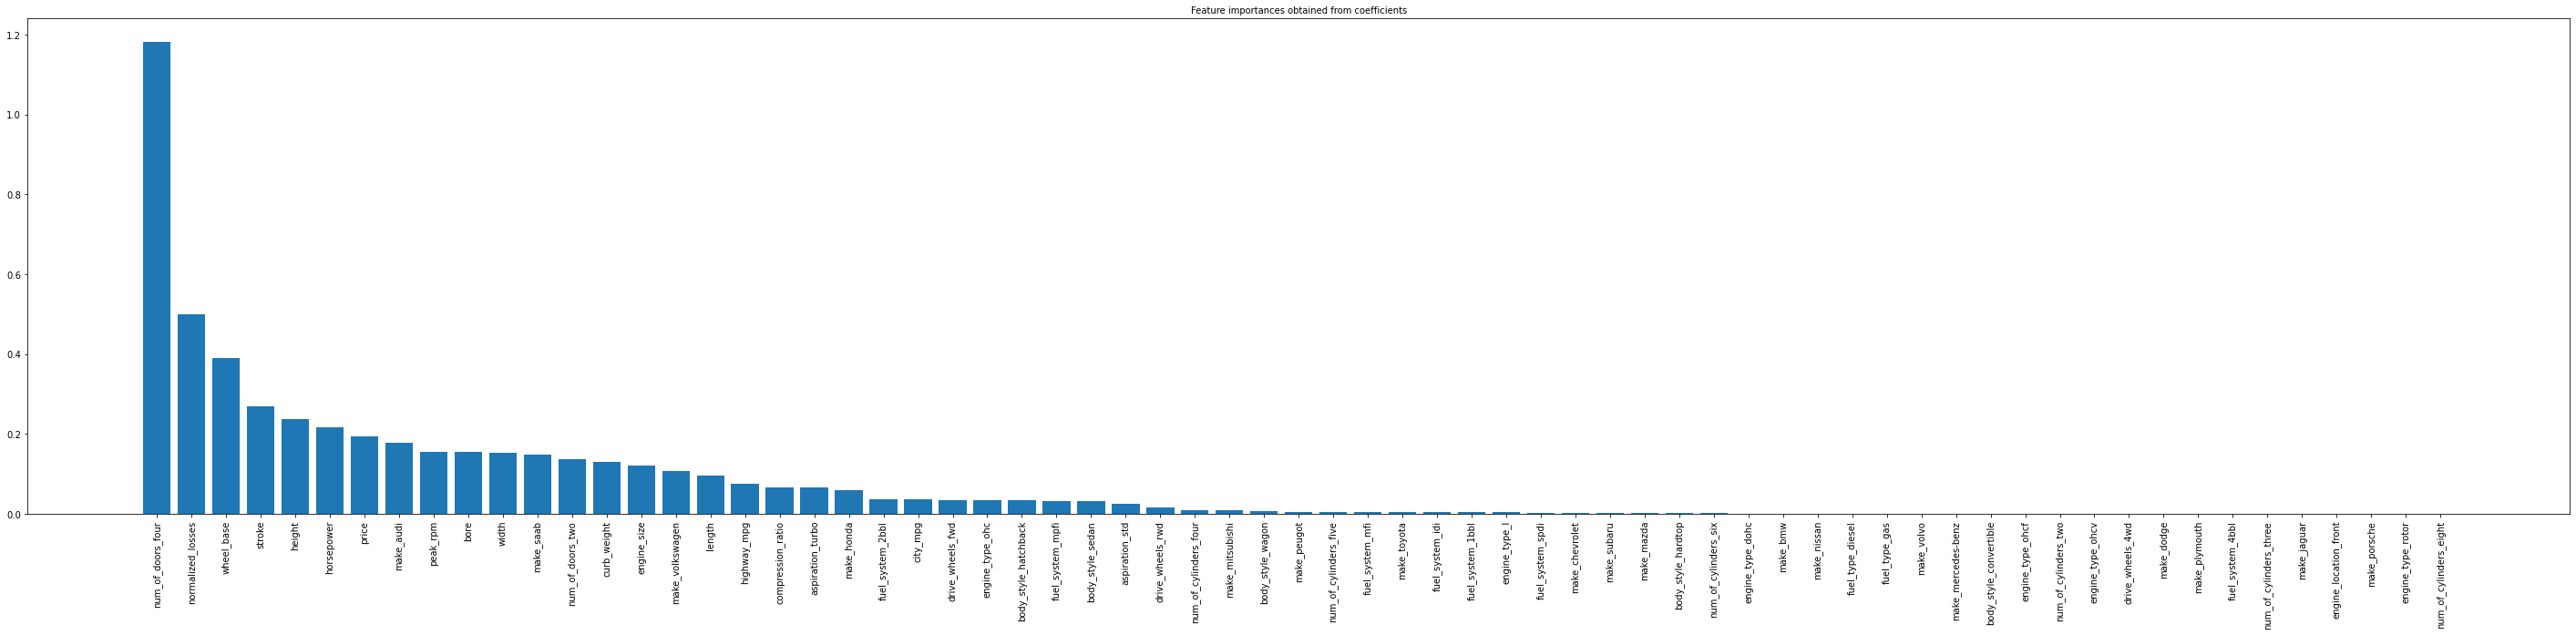

In [220]:

plt.figure(figsize=(50,10))
plt.bar(x=importances['Attribute'], height=importances['Importance_total'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical',size=10)
plt.show()

In [267]:
dropRows=importances.query('Importance_total<0.0025')['Attribute']
print(dropRows)

21                make_mazda
40        body_style_hardtop
57      num_of_cylinders_six
48          engine_type_dohc
16                  make_bmw
24               make_nissan
33          fuel_type_diesel
34             fuel_type_gas
32                make_volvo
22        make_mercedes-benz
39    body_style_convertible
51          engine_type_ohcf
59      num_of_cylinders_two
52          engine_type_ohcv
44          drive_wheels_4wd
18                make_dodge
26             make_plymouth
62          fuel_system_4bbl
58    num_of_cylinders_three
20               make_jaguar
47     engine_location_front
27              make_porsche
53         engine_type_rotor
54    num_of_cylinders_eight
Name: Attribute, dtype: object


In [268]:
dropNames = ['make_mazda','body_style_hardtop','num_of_cylinders_six','engine_type_dohc','make_bmw','make_nissan','fuel_type_diesel','fuel_type_gas','make_volvo','make_mercedes-benz','body_style_convertible','engine_type_ohcf','num_of_cylinders_two','engine_type_ohcv','drive_wheels_4wd','make_dodge','make_plymouth','fuel_system_4bbl','num_of_cylinders_three','make_jaguar','engine_location_front','make_porsche','engine_type_rotor','num_of_cylinders_eight']
X = X.drop(dropNames ,axis= 1)

# Repeat train test split from original dataset
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1)
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X,y, test_size=0.2, random_state=1)

## Modelling and individual results

### Decision Trees

#### Define parameter distributions

In [269]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 5000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 1000, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 2000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(valid_y), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

#### HyperParameter Tuning with Random Search

In [270]:
# Default model without any parameters
dtree_default = DecisionTreeClassifier(random_state=20)
# Randomized search applying a range of parameters
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=20), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 10000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)
# Best parameters
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 83, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 18, 'max_depth': 4591, 'criterion': 'gini'}


#### Hyperparameter tuning with Grid Search

In [272]:
# Create the grid parameter:
grid_dt = {'max_depth': [4580,4590,4600],
           'criterion': ['gini'], 
           'min_impurity_decrease': [0.001,0.005],
           'max_leaf_nodes': [10,18,30],  
           'min_samples_split': [50,83,100],
           'min_samples_leaf': [1,5,10]}

In [273]:
dtree = DecisionTreeClassifier(random_state=20)
# Create the grid:
gs_dt = GridSearchCV(dtree, grid_dt, cv=10, n_jobs=-1)

# Fit using grid search:
gs_dt.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [4580, 4590, 4600],
                         'max_leaf_nodes': [10, 18, 30],
                         'min_impurity_decrease': [0.001, 0.005],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [50, 83, 100]})

In [280]:
grid_search_best_params = gs_dt.best_params_
print('Best parameters found: ', grid_search_best_params)

Best parameters found:  {'criterion': 'gini', 'max_depth': 4580, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 83}


#### Predict with validation data

In [274]:
y_pred_Dtree = gs_dt.predict(valid_X)

print(f"{'Recall Score:':18}{recall_score(valid_y, y_pred_Dtree)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, y_pred_Dtree)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, y_pred_Dtree)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, y_pred_Dtree)}")

Recall Score:     1.0
Accuracy Score:   0.7959183673469388
Precision Score:  0.6774193548387096
F1 Score:         0.8076923076923077


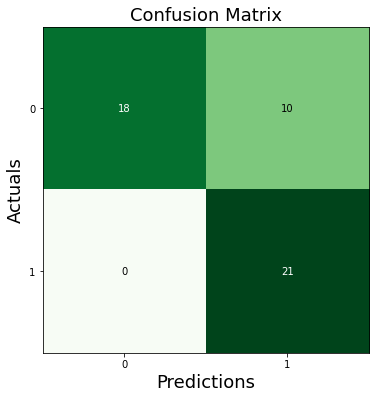

In [279]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y,y_pred_Dtree), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.0
F-Beta Score: 0.9130434782608695
ROC AUC Score: 0.8214285714285714


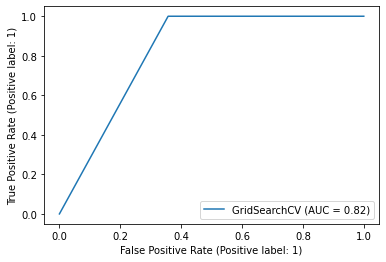

In [394]:
# Confusion matrix (focus on recall)
cm_dt = confusion_matrix(valid_y,y_pred_Dtree)

TP = cm_dt[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_dt[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_dt[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_dt[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_dt = FN/(TP+FN)
print("False Negative Rate:",FNR_dt)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_dt = fbeta_score(valid_y, y_pred_Dtree, beta=2.0)
print("F-Beta Score:",F2_dt)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_dt_p = gs_dt.predict_proba(valid_X)

AUC_dt = roc_auc_score(valid_y, y_pred_dt_p[:, 1])
print("ROC AUC Score:",AUC_dt)
RocCurveDisplay.from_estimator(gs_dt, valid_X, valid_y) 
plt.show()

### Random Forest (Bagging)

#### Define parameter distributions

In [313]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#### Hyperparameter tuning with Random Search

In [316]:
%%capture --no-display

# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state = 1)

# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
                            estimator=rf,
                              scoring=make_scorer(recall_score), 
        param_distributions=random_grid, 
        n_iter = 10, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

_ = best_random_search_model.fit(train_X, train_y)


In [317]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


#### Hyperparameter tuning with Grid Search

In [318]:
# Create the grid parameter:
grid_rf = {'n_estimators': [800, 900],
           'max_depth': [80,100], 
           'min_samples_split': [5,7],
           'bootstrap': [False],
           'max_features': ['sqrt'],
           'min_samples_leaf': [2,4]}

forest = RandomForestClassifier()
# Create the grid:
gs_rf = GridSearchCV(forest, grid_rf, cv=10, n_jobs=-1)

# Fit using grid search:
gs_rf.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [80, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 7],
                         'n_estimators': [800, 900]})

In [319]:
grid_search_best_params = gs_rf.best_params_
print('Best parameters found: ', grid_search_best_params)

Best parameters found:  {'bootstrap': False, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}


#### Predict with validation data

In [320]:
y_pred_rf = gs_rf.predict(valid_X)
print(f"{'Recall Score:':18}{recall_score(valid_y, y_pred_rf)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, y_pred_rf)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, y_pred_rf)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, y_pred_rf)}")

Recall Score:     1.0
Accuracy Score:   0.9795918367346939
Precision Score:  0.9545454545454546
F1 Score:         0.9767441860465117


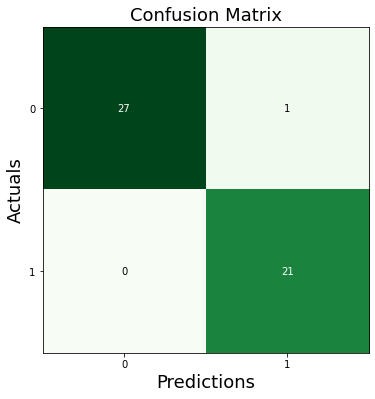

In [321]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y,y_pred_rf), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.0
F-Beta Score: 0.9905660377358492
ROC AUC Score: 1.0


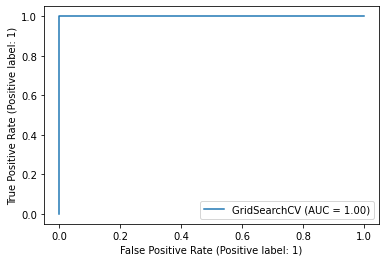

In [395]:
# Confusion matrix (focus on recall)
cm_rf = confusion_matrix(valid_y,y_pred_rf)

TP = cm_rf[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_rf[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_rf[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_rf[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_rf = FN/(TP+FN)
print("False Negative Rate:",FNR_rf)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_rf = fbeta_score(valid_y, y_pred_rf, beta=2.0)
print("F-Beta Score:",F2_rf)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_rf_p = gs_rf.predict_proba(valid_X)

AUC_rf = roc_auc_score(valid_y, y_pred_rf_p[:, 1])
print("ROC AUC Score:",AUC_rf)
RocCurveDisplay.from_estimator(gs_rf, valid_X, valid_y) 
plt.show()

### AdaBoost (Boosting)

#### Define parameter distributions

In [331]:
#n_estimators
#The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf)
n_estimators = [int(x) for x in np.linspace(1, 5000, 5)]
#Learning_rate
#Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range (0.0, inf).
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param_grid_random = { 'n_estimators': n_estimators,
                      'learning_rate': learning_rate
                     }

#### Hyperparameter tuning with Random Search

In [333]:

#Initializing Random search
random_seed=1
best_random_search_model = RandomizedSearchCV(
        estimator=AdaBoostClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 10, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_Ada_model = best_random_search_model.fit(train_X, train_y)

#Finding Best parameters
random_search_best_Ada_params = best_random_search_Ada_model.best_params_

print('Best parameters found: ', random_search_best_Ada_params)

Best parameters found:  {'n_estimators': 2500, 'learning_rate': 0.6}


#### Hyperparameter tuning with Grid Search

In [334]:
# Create the grid parameter:
grid_ada = {'n_estimators': [2480,2490,2500,2600],
           
           'learning_rate': [0.5,0.6,0.7,0.8]}

adab = AdaBoostClassifier(random_state=20)
# Create the grid:
gs_ad = GridSearchCV(adab, grid_ada, cv=10, n_jobs=-1)

# Fit using grid search:
gs_ad.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=20), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [2480, 2490, 2500, 2600]})

In [336]:
grid_search_best_params = gs_ad.best_params_
print('Best parameters found: ', grid_search_best_params)

Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 2480}


#### Predict with validation data

In [337]:
y_pred_ad = gs_ad.predict(valid_X)

print(f"{'Recall Score:':18}{recall_score(valid_y, y_pred_ad)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, y_pred_ad)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, y_pred_ad)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, y_pred_ad)}")

Recall Score:     0.8571428571428571
Accuracy Score:   0.9183673469387755
Precision Score:  0.9473684210526315
F1 Score:         0.9


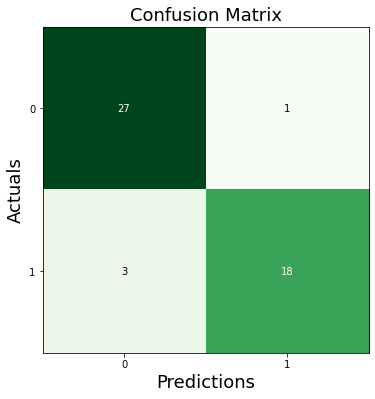

In [338]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y,y_pred_ad), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.14285714285714285
F-Beta Score: 0.8737864077669902
ROC AUC Score: 0.9829931972789115


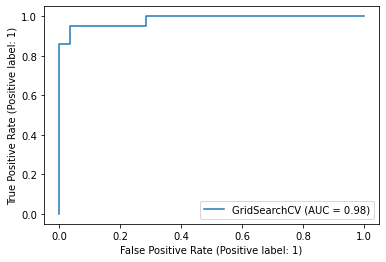

In [396]:
# Confusion matrix (focus on recall)
cm_ad = confusion_matrix(valid_y,y_pred_ad)

TP = cm_ad[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_ad[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_ad[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_ad[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_ad = FN/(TP+FN)
print("False Negative Rate:",FNR_ad)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_ad = fbeta_score(valid_y, y_pred_ad, beta=2.0)
print("F-Beta Score:",F2_ad)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_ad_p = gs_ad.predict_proba(valid_X)

AUC_ad = roc_auc_score(valid_y, y_pred_ad_p[:, 1])
print("ROC AUC Score:",AUC_ad)
RocCurveDisplay.from_estimator(gs_ad, valid_X, valid_y) 
plt.show()

### GradientBoost (Boosting)

#### Define parameter distributions

In [352]:
param_grid = {
# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure
    'max_depth': [int(x) for x in np.linspace(1, 5000, 50)],
#min_samples_split
#The minimum number of samples required to split an internal node
    'min_samples_split': [int(x) for x in np.linspace(2, 1000, 50)],
#Learning_rate
#Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range (0.0, inf).
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#n_estimators
#The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf)
    'n_estimators' :[int(x) for x in np.linspace(1, 5000, 5)],
#criterion
#The function to measure the quality of a split. Supported criteria are ‘friedman_mse’ for the mean squared error with improvement score by Friedman, ‘squared_error’ for mean squared error. The default value of ‘friedman_mse’ is generally the best as it can provide a better approximation in some cases.
    'criterion':['mse','friedman_mse','squarred_error'],
# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    'min_impurity_decrease' :  [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
}

#### Hyperparameter tuning with Random Search

In [354]:
%%capture --no-display

# Use the random grid to search for best hyperparameters
gr = GradientBoostingClassifier(random_state = 1)

# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
                            estimator=gr,
                              scoring=make_scorer(recall_score), 
        param_distributions=param_grid, 
        n_iter = 10, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

best_grad= best_random_search_model.fit(train_X2, train_y2)

In [358]:
random_search_best_grad_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_grad_params)

Best parameters found:  {'n_estimators': 3750, 'min_samples_split': 103, 'min_impurity_decrease': 0.0042, 'max_depth': 409, 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


#### Hyperparameter tuning with Grid Search

In [397]:
# Create the grid parameter:
grid_gb = {'n_estimators': [3500,3750],
           'learning_rate': [0.2,0.3],
           'min_samples_split': [103,104],
           'min_impurity_decrease': [0.003,0.0042],
           'max_depth': [350,409],
           'criterion': ['friedman_mse']}

In [398]:
gradient = GradientBoostingClassifier(random_state=20)
# Create the grid:
grad_md = GridSearchCV(gradient, grid_gb, cv=10, n_jobs=-1)

# Fit using grid search:
grad_md.fit(train_X2, train_y2)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.2, 0.3], 'max_depth': [350, 409],
                         'min_impurity_decrease': [0.003, 0.0042],
                         'min_samples_split': [103, 104],
                         'n_estimators': [3500, 3750]})

In [399]:
grid_search_best_params = grad_md.best_params_
print('Best parameters found: ', grid_search_best_params)

Best parameters found:  {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 350, 'min_impurity_decrease': 0.003, 'min_samples_split': 103, 'n_estimators': 3500}


#### Predict with validation data

In [401]:
y_pred_gr = grad_md.predict(valid_X2)

print(f"{'Recall Score:':18}{recall_score(valid_y2, y_pred_gr)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y2, y_pred_gr)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y2, y_pred_gr)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y2, y_pred_gr)}")

Recall Score:     1.0
Accuracy Score:   0.9696969696969697
Precision Score:  0.9375
F1 Score:         0.967741935483871


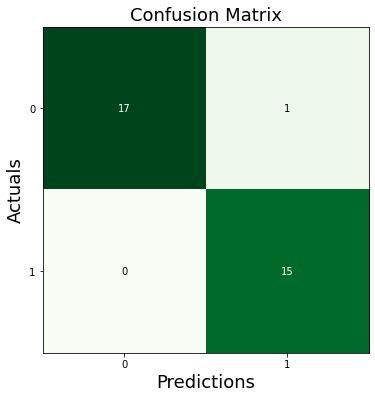

In [403]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y2,y_pred_gr), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.0
F-Beta Score: 0.9868421052631579
ROC AUC Score: 1.0


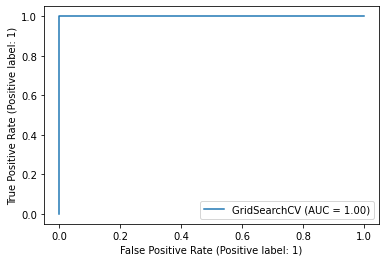

In [405]:
# Confusion matrix (focus on recall)
cm_gr = confusion_matrix(valid_y2,y_pred_gr)

TP = cm_gr[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_gr[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_gr[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_gr[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_gr = FN/(TP+FN)
print("False Negative Rate:",FNR_gr)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_gr = fbeta_score(valid_y2, y_pred_gr, beta=2.0)
print("F-Beta Score:",F2_gr)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_gr_p = grad_md.predict_proba(valid_X2)

AUC_gr = roc_auc_score(valid_y2, y_pred_gr_p[:, 1])
print("ROC AUC Score:",AUC_gr)
RocCurveDisplay.from_estimator(grad_md, valid_X2, valid_y2) 
plt.show()

### XGBoost (Boosting)

#### Define parameter distributions

In [288]:
params = {
# number of trees in the ensemble which is the same number of boosting rounds
    'n_estimators':[500],
# Minimum sum of instance weight (hessian) needed in a child.
    'min_child_weight':[4,5], 
# Minimum loss reduction required to make a further partition on a leaf node of the tree
    'gamma':[i/10.0 for i in range(3,6)],  
# fraction of observations that need to be sampled for each tree
    'subsample':[i/10.0 for i in range(6,11)],
# subsample ratio of columns when constructing each tree
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
# Depth of tree
    'max_depth': [2,3,4,6,7],
# Learning objective
    'objective': ['reg:squarederror'],
# Choosing which booster to use -gbtree for tree based models and gblinear for linear functions.
    'booster': ['gbtree'],
# Evaluation metrics for validation data
    'eval_metric': ['rmse'],
# Step size at each iteration
    'eta': [i/10.0 for i in range(3,6)],
}

#### Hyperparameter tuning with Random Search

In [289]:
# Default model without any parameters
XGB_default = XGBClassifier(random_state=1)
# Randomized search applying a range of parameters
best_random_search_model = RandomizedSearchCV(
        estimator=XGB_default, 
        scoring='recall', 
        param_distributions=params, 
        n_iter = 500, 
        cv=5, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X2, train_y2)
# Best parameters
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'subsample': 1.0, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'gamma': 0.3, 'eval_metric': 'rmse', 'eta': 0.5, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


#### Hyperparameter tuning with Grid Search

In [291]:
%%capture --no-display

# Create the grid parameter:
grid_xg = {'max_depth': [6,8],
           'booster': ['gbtree'], 
           'subsample': [1.0,1.2],
           'objective': ['reg:squarederror'],  
           'n_estimators': [450,500],
           'gamma': [0.3,0.4],
           'eval_metric': ['rmse'],
           'eta': [0.4,0.5],
           'colsample_bytree': [0.8,1.2],
           'min_child_weight': [5,7]}

xgtree = XGBClassifier(random_state=1)
# Create the grid:
gs_xg = GridSearchCV(xgtree, grid_xg, cv=10, n_jobs=-1)

# Fit using grid search:
gs_xg.fit(train_X2, train_y2)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.8, 1.2],
                         'eta': [0.4, 0.5], 'eval_metric': ['rmse'],
                         'gamma': [0.3, 0.4], 'max_depth': [6, 8],
                         'min_child_weight': [5, 7], 'n_estimators': [450, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [1.0, 1.2]})

In [292]:
grid_search_best_params = gs_xg.best_params_
print('Best parameters found: ', grid_search_best_params)

Best parameters found:  {'booster': 'gbtree', 'colsample_bytree': 0.8, 'eta': 0.4, 'eval_metric': 'rmse', 'gamma': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 450, 'objective': 'reg:squarederror', 'subsample': 1.0}


#### Predict with validation data

In [293]:
y_pred_XGtree = gs_xg.predict(valid_X2)

print(f"{'Recall Score:':18}{recall_score(valid_y2, y_pred_XGtree)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y2, y_pred_XGtree)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y2, y_pred_XGtree)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y2, y_pred_XGtree)}")

Recall Score:     1.0
Accuracy Score:   0.9696969696969697
Precision Score:  0.9375
F1 Score:         0.967741935483871


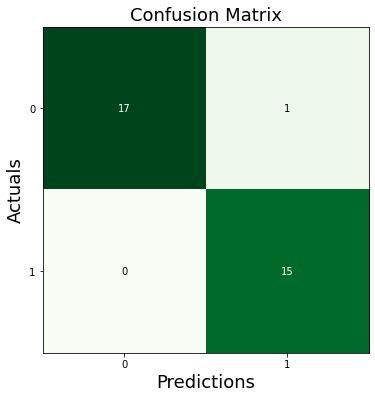

In [294]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y2,y_pred_XGtree), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.0
F-Beta Score: 0.9868421052631579
ROC AUC Score: 1.0


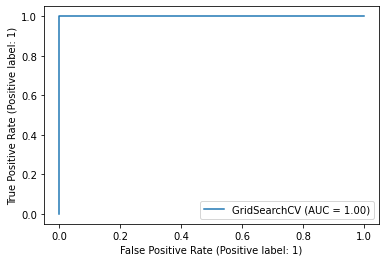

In [406]:
# Confusion matrix (focus on recall)
cm_xg = confusion_matrix(valid_y2,y_pred_XGtree)

TP = cm_xg[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_xg[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_xg[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_xg[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_xg = FN/(TP+FN)
print("False Negative Rate:",FNR_xg)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_xg = fbeta_score(valid_y2, y_pred_XGtree, beta=2.0)
print("F-Beta Score:",F2_xg)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_xg_p = gs_xg.predict_proba(valid_X2)

AUC_xg = roc_auc_score(valid_y2, y_pred_xg_p[:, 1])
print("ROC AUC Score:",AUC_xg)
RocCurveDisplay.from_estimator(gs_xg, valid_X2, valid_y2) 
plt.show()

### k-Nearest Neighbors

#### Define parameter distributions

In [369]:
# set search parameters

#minimum number of neighbors required
#default = 5
n_neighbors = [int(x) for x in np.linspace(1,100,50)]

# Weight function used in prediction
weights = ['uniform','distance']

#Metric to use for distance computation
#default= minkowski
metric = ['euclidean','manhattan','chebyshev','seuclidean','minkowski'] 

# Power parameter for the Minkowski metric
p = [int(x) for x in np.linspace(1,20,10)]

#Leaf size passed to BallTree or KDTree
leaf_size = [int(x) for x in np.linspace(1,100,10)]


# Create the random grid
random_grid_knn = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
    'p':p,
    'leaf_size': leaf_size
}


#### Hyperparameter tuning with Random Search

In [377]:
%%capture --no-display

knn = KNeighborsClassifier() 
knn_random = RandomizedSearchCV(estimator = knn, 
                                random_state = 1,
                                n_jobs = -1,
                                param_distributions = random_grid_knn,
                                n_iter = 1000,
                                cv=3,
                                verbose = 2)
knn_random.fit(train_X, train_y)


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'leaf_size': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'seuclidean',
                                                   'minkowski'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29, 31, 33, 35, 37,
                                                        39, 41, 43, 45, 47, 49,
                                                        51, 53, 55, 57, 59, ...],
                                        'p': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, verbose=2)

In [378]:

random_search_best_params_knn = knn_random.best_params_
print('Best parameters found: ', random_search_best_params_knn)

Best parameters found:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'euclidean', 'leaf_size': 78}


#### Hyperparameter tuning with Grid Search

In [379]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')

#create the grid parameter:
parameters_KNN = {  'n_neighbors':[3,4,5,6],
    'leaf_size': [70,78,90],
    'p': [1,2,3],
    'weights': ['uniform'],
   'metric': ['euclidean']
                 }

score_measure = 'recall'

# Create the grid:
gridSearch = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring=score_measure,
    n_jobs = -1,
    cv = 5
)

# Fit using grid search:
gridSearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [70, 78, 90], 'metric': ['euclidean'],
                         'n_neighbors': [3, 4, 5, 6], 'p': [1, 2, 3],
                         'weights': ['uniform']},
             scoring='recall')

In [380]:
print('parameters: ', gridSearch.best_params_)

parameters:  {'leaf_size': 70, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


#### Predict with validation data

In [381]:
validation_predictions = gridSearch.predict(valid_X)

print(f"{'Recall Score:':18}{recall_score(valid_y, validation_predictions)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, validation_predictions)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, validation_predictions)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, validation_predictions)}")

Recall Score:     0.38095238095238093
Accuracy Score:   0.5714285714285714
Precision Score:  0.5
F1 Score:         0.4324324324324324


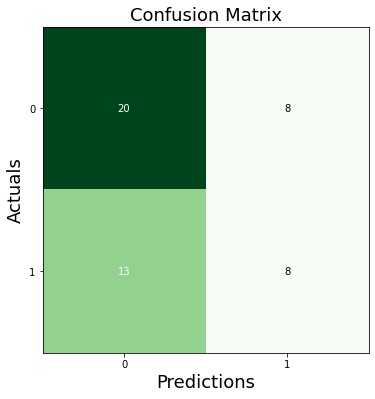

In [382]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y,validation_predictions), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.6190476190476191
F-Beta Score: 0.39999999999999997
ROC AUC Score: 0.6062925170068028


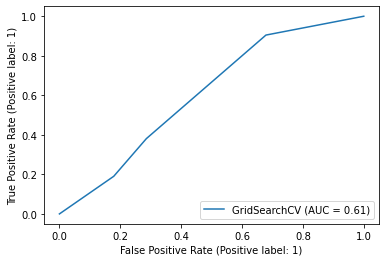

In [407]:
# Confusion matrix (focus on recall)
cm_kn = confusion_matrix(valid_y,validation_predictions)

TP = cm_kn[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_kn[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_kn[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_kn[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_kn = FN/(TP+FN)
print("False Negative Rate:",FNR_kn)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_kn = fbeta_score(valid_y, validation_predictions, beta=2.0)
print("F-Beta Score:",F2_kn)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_kn_p = gridSearch.predict_proba(valid_X)

AUC_kn = roc_auc_score(valid_y, y_pred_kn_p[:, 1])
print("ROC AUC Score:",AUC_kn)
RocCurveDisplay.from_estimator(gridSearch, valid_X, valid_y) 
plt.show()

### Logistic Regression

#### Define parameter distributions

In [409]:
# Create the parameter grid
param_grid2 = [    
# Specify the norm of the penalty
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
# Dual or primal formulation
    'dual': [True,False],
# Inverse of regularization strength
    'C' : np.logspace(-4, 4, 20),
# Algorithm to use in the optimization problem
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
# Maximum number of iterations taken for the solvers to converge
    'max_iter' : [100, 1000,2500, 5000],
# Tolerance for stopping criteria
    'tol': np.logspace(-4, 4, 20)
    }
]

#### Hyperparameter tuning with Random Search

In [410]:
lr = LogisticRegression(random_state = 1)

# Use the random grid to search for best hyperparameters
recall = make_scorer(recall_score)

best_random_search_model = RandomizedSearchCV(
                            estimator=lr,
                            scoring=recall,
        param_distributions=param_grid2, 
        n_iter = 100, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

In [412]:
%%capture --no-display

_ = best_random_search_model.fit(train_X, train_y)

random_search_best_params = best_random_search_model.best_params_

In [413]:
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'tol': 0.004832930238571752, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'dual': True, 'C': 78.47599703514607}


#### Hyperparameter tuning with Grid Search

In [415]:
%%capture --no-display

# Create the grid parameter:
grid_lr = {'tol': [0.004832930238571752,0.006],
           'solver': ['liblinear'], 
           'penalty': ['l2'],
           'dual': [True],  
           'max_iter': [100,150],
           'C': [78.47599703514607,80]}

lrgrid = LogisticRegression(random_state = 1)
# Create the grid:
gs_lr = GridSearchCV(lrgrid, grid_lr, cv=10, n_jobs=-1)

# Fit using grid search:
gs_lr.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [78.47599703514607, 80], 'dual': [True],
                         'max_iter': [100, 150], 'penalty': ['l2'],
                         'solver': ['liblinear'],
                         'tol': [0.004832930238571752, 0.006]})

In [416]:
print('parameters: ', gs_lr.best_params_)

parameters:  {'C': 78.47599703514607, 'dual': True, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.004832930238571752}


#### Predict with validation data

In [417]:
y_pred_lr = gs_lr.predict(valid_X)

print(f"{'Recall Score:':18}{recall_score(valid_y, y_pred_lr)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, y_pred_lr)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, y_pred_lr)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, y_pred_lr)}")

Recall Score:     1.0
Accuracy Score:   0.42857142857142855
Precision Score:  0.42857142857142855
F1 Score:         0.6


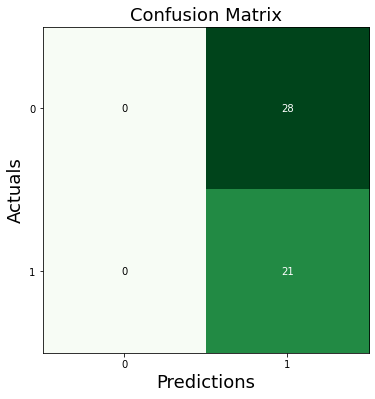

In [418]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(valid_y,y_pred_lr), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.0
F-Beta Score: 0.7894736842105262
ROC AUC Score: 0.8401360544217686


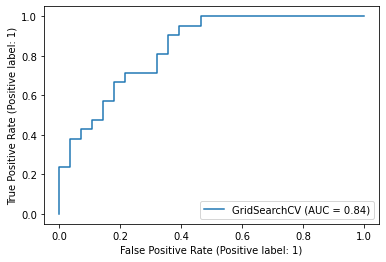

In [419]:
# Confusion matrix (focus on recall)
cm_lr = confusion_matrix(valid_y,y_pred_lr)

TP = cm_lr[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_lr[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_lr[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_lr[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_lr = FN/(TP+FN)
print("False Negative Rate:",FNR_lr)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_lr = fbeta_score(valid_y, y_pred_lr, beta=2.0)
print("F-Beta Score:",F2_lr)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_lr_p = gs_lr.predict_proba(valid_X)

AUC_lr = roc_auc_score(valid_y, y_pred_lr_p[:, 1])
print("ROC AUC Score:",AUC_lr)
RocCurveDisplay.from_estimator(gs_lr, valid_X, valid_y) 
plt.show()

### Multi-Layer Perceptron

#### Define parameter distributions

In [383]:
# Define Hidden layer sizes

# Results from both RandomSearchCV and GridSearchCV were lacking, due to the difficulty cycling
# through different values for 'hidden_layer_sizes'. Because this parameter impacts the model 
# performance so significantly we decided to create classifiers with user defined 'hidden_layer_sizes'
# and discovered a single hidden layer typical provided the most consistent results. 

ann_default = MLPClassifier(max_iter=2500)
ann_layers1 = MLPClassifier(hidden_layer_sizes=[20,],solver='adam',max_iter=2000, random_state = 64)
ann_layers2 = MLPClassifier(hidden_layer_sizes=[20,8],solver='adam',max_iter=2000, random_state = 64)
ann_layers3 = MLPClassifier(hidden_layer_sizes=[20,12,6],solver='adam',max_iter=2000, random_state = 64)

#### Model training and interpretation

In [384]:
%%time
ann_default.fit(train_X, train_y)
ann_layers1.fit(train_X, train_y)
ann_layers2.fit(train_X, train_y)
ann_layers3.fit(train_X, train_y)

CPU times: total: 2.08 s
Wall time: 1.68 s


MLPClassifier(hidden_layer_sizes=[20, 12, 6], max_iter=2000, random_state=64)

In [386]:
y_pred_def = ann_default.predict(valid_X)
y_pred_lr1 = ann_layers1.predict(valid_X)
y_pred_lr2 = ann_layers2.predict(valid_X)
y_pred_lr3 = ann_layers3.predict(valid_X)

In [387]:
print("DEFAULT\n", classification_report(valid_y, y_pred_def))
print("layers=[20,]\n", classification_report(valid_y, y_pred_lr1))
print("layers=[20,8]\n", classification_report(valid_y, y_pred_lr2))
print("layers=[20,12,6]\n", classification_report(valid_y, y_pred_lr3))

DEFAULT
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        28
           1       0.62      0.38      0.47        21

    accuracy                           0.63        49
   macro avg       0.63      0.60      0.59        49
weighted avg       0.63      0.63      0.61        49

layers=[20,]
               precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.71      0.95      0.82        21

    accuracy                           0.82        49
   macro avg       0.83      0.83      0.82        49
weighted avg       0.85      0.82      0.82        49

layers=[20,8]
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.72      0.86      0.78        21

    accuracy                           0.80        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.81      0.80   

#### Predict with validation data

In [388]:
# Picking the model with the better recall rate
y_pred_mlp = ann_layers1.predict(valid_X)

print(f"{'Recall Score:':18}{recall_score(valid_y, y_pred_mlp)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(valid_y, y_pred_mlp)}")
print(f"{'Precision Score: ':18}{precision_score(valid_y, y_pred_mlp)}")
print(f"{'F1 Score: ':18}{f1_score(valid_y, y_pred_mlp)}")

Recall Score:     0.9523809523809523
Accuracy Score:   0.8163265306122449
Precision Score:  0.7142857142857143
F1 Score:         0.8163265306122449


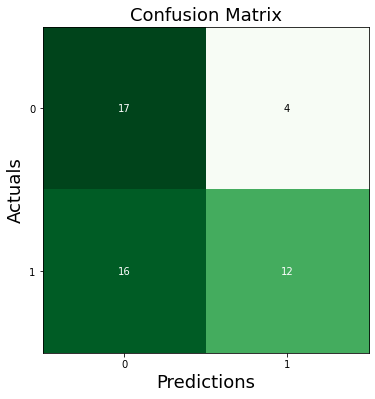

In [389]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_pred_mlp,validation_predictions), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative Rate: 0.047619047619047616
F-Beta Score: 0.8928571428571428
ROC AUC Score: 0.9149659863945578


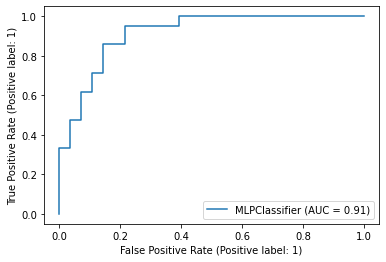

In [408]:
# Confusion matrix (focus on recall)
cm_mp = confusion_matrix(valid_y,y_pred_mlp)

TP = cm_mp[1, 1] # True Positives (we predict 'RISK', is 'RISK')
TN = cm_mp[0, 0] # True Negatives (we predict 'SAFE', is 'SAFE')
FP = cm_mp[0, 1] # False Positives (we predict 'RISK', is 'SAFE')
FN = cm_mp[1, 0] # False Negatives (we predict 'SAFE', is 'RISK')*

# False negative rate
FNR_mp = FN/(TP+FN)
print("False Negative Rate:",FNR_mp)
      
# F2 score (beta=2)
# Metric that combines precision and recall, putting 2x emphasis on recall.
F2_mp = fbeta_score(valid_y, y_pred_mlp, beta=2.0)
print("F-Beta Score:",F2_mp)
# ROC AUC
# Get prediction probabilities ('predict_proba' instead of 'predict') for ROC AUC score
y_pred_mp_p = ann_layers1.predict_proba(valid_X)

AUC_mp = roc_auc_score(valid_y, y_pred_mp_p[:, 1])
print("ROC AUC Score:",AUC_mp)
RocCurveDisplay.from_estimator(ann_layers1, valid_X, valid_y) 
plt.show()

## Results

| **Model**                    | **Recall Score** | **Accuracy Score** | **False Negative Rate** | **F-Beta Score** | **ROC AUC Score** |
|------------------------------|------------------|--------------------|-------------------------|------------------|-------------------|
| **Decision Tree**            | 1.0              | 0.795              | 0.0                     | 0.913            | 0.821             |
| **Random Forest (Bagging)**  | 1.0              | 0.979              | 0.0                     | 0.990            | 1.0               |
| **AdaBoost (Boosting)**      | 0.857            | 0.918              | 0.142                   | 0.873            | 0.982             |
| **GradientBoost (Boosting)** | 1.0              | 0.969              | 0.0                     | 0.986            | 1.0               |
| **XGBoost (Boosting)**       | 1.0              | 0.969              | 0.0                     | 0.986            | 1.0               |
| **k-NN**                     | 0.380            | 0.571              | 0.619                   | 0.399            | 0.606             |
| **Logistic Regression**      | 1.0              | 0.428              | 0.0                     | 0.789            | 0.840             |
| **Multi-Layer Perceptron**   | 0.952            | 0.816              | 0.047                   | 0.892            | 0.914             |

**In the context of our analysis we are focusing on recall to avoid the classification of false negatives (mistakenly identifying a risk driver as safe) because this would result in the most loss from the insurance company. Based on the metrics above, Random Forest achieves the highest results for f-beta and recall. Additionally, the ROC AUC score indicates them model is fit well against the data, so we can be confident these predictions are sound.**

Insurance companies are motivated to offer competitive, individualized rates
Better risk prediction will help insurance companies achieve this.

After establishing RandomForest as the selected binary classification model, we understand this can be used by insurance companies to better identify which car models can be assumed as risky.

Although this only contributes to a portion of the overall risk assessment from the car insurance company, we've seen that these processes are already automated to consider additional risk factors and our model helps optimize this process for the car attributes specifically.

With our model, insurance companies can better predict whether the car model is associated with risk, therefore increasing the efficacy of their overall ratemaking process. This allows them to offer customers more individualized insurance rates which promotes customer retention and company solvency.